In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary packages
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imutils import paths

import skimage
import sys
from skimage import io, color
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu
from skimage.feature import canny 
from skimage.transform import resize
from skimage.color import rgb2hsv
from skimage.color import rgb2gray
import skimage.feature

In [ ]:
# function to get input images from folder
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
    return allFiles


# setting labels
def labeling(train):
  train['Label'] = train['imagename'].str.replace('\d+', '')
  train['Label'] = train['Label'].str.replace('_.jpg', '')
  train['Label'] = train['Label'].str.replace('_.png', '')
  return train['Label']

# encoding labels
def encodelabels(labels):  
  Encoder = LabelEncoder()
  labels =  Encoder.fit_transform(labels)                                                       
  return labels


In [ ]:
# getting image files
imagePaths = getListOfFiles("/content/drive/MyDrive/IITMK/sem3/CV term paper/datasets/Tamil_troll_memes/training_img/") ## Folder structure: datasets --> sub-folders with labels name
#print(imagePaths)

# setting up labels
df = pd.read_csv('/content/drive/MyDrive/IITMK/sem3/CV term paper/datasets/Tamil_troll_memes/train_captions.csv',sep=',')
labels = labeling(df)
labels= encodelabels(df['Label'])


In [ ]:
import skimage
from skimage import io, color
from skimage.io import imread, imshow
from skimage.filters import threshold_otsu 
  

data = []
for image in imagePaths:
  img = cv2.imread(image)  
  img = cv2.GaussianBlur(img,(5,5),0)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_LINEAR)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  # threshold_value = threshold_otsu(img)
  # img_threshold = img > threshold_value  
  ret,img_threshold = cv2.threshold(img,127,255,cv2.THRESH_OTSU)

  data.append(img_threshold)


### visualization of thresholds 

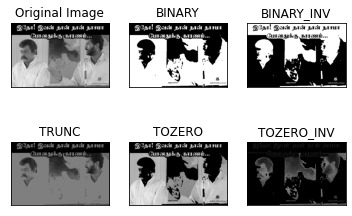

In [ ]:
# import cv2 as cv
# import numpy as np
# from matplotlib import pyplot as plt
# img = cv.imread('/content/drive/MyDrive/IITMK/sem3/CV term paper/datasets/Tamil_troll_memes/training_img/train/Not_troll_100.jpg',0)
# ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
# ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
# ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
# ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
# titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
# images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
# for i in range(6):
#     plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
#     plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
# plt.show()

In [ ]:

data = np.array(data)
myset = set(labels)
print(myset)

dataset_size = data.shape[0]
data = data.reshape(dataset_size,-1)

print(data.shape)
print(labels.shape)
print(dataset_size)

(trainX, testX, trainY, testY ) = train_test_split(data, labels, test_size= 0.25, random_state=42)

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
# model = SVC(C=10, kernel='sigmoid', degree = 3)
model.fit(trainX, trainY)
print(confusion_matrix(testY, model.predict(testX)))
print(classification_report(testY, model.predict(testX)))

{0, 1}
(2300, 50176)
(2300,)
2300
[[257   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       257
           1       0.00      0.00      0.00       318

    accuracy                           0.45       575
   macro avg       0.22      0.50      0.31       575
weighted avg       0.20      0.45      0.28       575



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(data)

In [ ]:

'''(2300, 150528)
(2300,)
2300

########   Colored image   ###########
 
# KNN
[[100 157]
 [106 212]]
              precision    recall  f1-score   support

           0       0.49      0.39      0.43       257
           1       0.57      0.67      0.62       318

    accuracy                           0.54       575
   macro avg       0.53      0.53      0.52       575
weighted avg       0.53      0.54      0.53       575


# SVM

[[108 149]
 [165 153]]
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       257
           1       0.51      0.48      0.49       318

    accuracy                           0.45       575
   macro avg       0.45      0.45      0.45       575
weighted avg       0.46      0.45      0.46       575



######### grayscale image #########

KNN

[[ 92 165]
 [107 211]]
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       257
           1       0.56      0.66      0.61       318

    accuracy                           0.53       575
   macro avg       0.51      0.51      0.51       575
weighted avg       0.52      0.53      0.52       575


SVM


[[107 150]
 [162 156]]
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       257
           1       0.51      0.49      0.50       318

    accuracy                           0.46       575
   macro avg       0.45      0.45      0.45       575
weighted avg       0.46      0.46      0.46       575



######### Simlple Threshold  ########

KNN

[[ 92 165]
 [107 211]]
              precision    recall  f1-score   support

           0       0.46      0.36      0.40       257
           1       0.56      0.66      0.61       318

    accuracy                           0.53       575
   macro avg       0.51      0.51      0.51       575
weighted avg       0.52      0.53      0.52       575


SVM

[[107 150]
 [162 156]]
              precision    recall  f1-score   support

           0       0.40      0.42      0.41       257
           1       0.51      0.49      0.50       318

    accuracy                           0.46       575
   macro avg       0.45      0.45      0.45       575
weighted avg       0.46      0.46      0.46       575


########   Thereshold Binary  ########

KNN

[[257   0]
 [318   0]]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62       257
           1       0.00      0.00      0.00       318

    accuracy                           0.45       575
   macro avg       0.22      0.50      0.31       575
weighted avg       0.20      0.45      0.28       575


SVM

[[  0 257]
 [  0 318]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.55      1.00      0.71       318

    accuracy                           0.55       575
   macro avg       0.28      0.50      0.36       575
weighted avg       0.31      0.55      0.39       575


##########  Threshold binary inverted  ##########

KNN

{0, 1}
(2300, 50176)
(2300,)
2300
[[248   9]
 [312   6]]
              precision    recall  f1-score   support

           0       0.44      0.96      0.61       257
           1       0.40      0.02      0.04       318

    accuracy                           0.44       575
   macro avg       0.42      0.49      0.32       575
weighted avg       0.42      0.44      0.29       575


SVM

{0, 1}
(2300, 50176)
(2300,)
2300
[[  0 257]
 [  0 318]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       257
           1       0.55      1.00      0.71       318

    accuracy                           0.55       575
   macro avg       0.28      0.50      0.36       575
weighted avg       0.31      0.55      0.39       575


'''

